<a href="https://colab.research.google.com/github/SomGitHub2018/EIP4_Classes/blob/master/CEPI4_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, Conv2D
from keras.utils import np_utils
#import tf.keras as keras

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


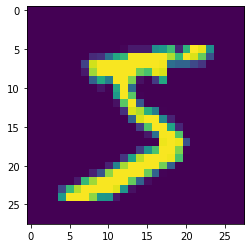

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()
 
model.add(Conv2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(28, 3, 3, activation='relu', input_shape=(12,12,1)))
model.add(Conv2D(10, 1, activation='relu'))

model.add(Conv2D(32, 3, 3, activation='relu', input_shape=(6,6,1)))
model.add(Conv2D(32, 3, 3, activation='relu', input_shape=(3,3,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.70))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(28, (3, 3), activation="relu", input_shape=(12, 12, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(6, 6, 1))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(3, 3, 1))`
  if __name__ == '__main__':


In [0]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 24, 24, 28)        8092      
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 24, 24, 10)        290       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 22, 22, 32)        2912      
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 20, 20, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 10, 10, 32)       

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=12, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/12
60000/60000 [==============================] - 11s 185us/step - loss: 0.2337 - acc: 0.9273
Epoch 2/12
60000/60000 [==============================] - 10s 169us/step - loss: 0.0978 - acc: 0.9705
Epoch 3/12
60000/60000 [==============================] - 10s 170us/step - loss: 0.0786 - acc: 0.9764
Epoch 4/12
60000/60000 [==============================] - 10s 169us/step - loss: 0.0683 - acc: 0.9790
Epoch 5/12
60000/60000 [==============================] - 10s 169us/step - loss: 0.0590 - acc: 0.9816
Epoch 6/12
60000/60000 [==============================] - 10s 169us/step - loss: 0.0559 - acc: 0.9827
Epoch 7/12
60000/60000 [==============================] - 10s 168us/step - loss: 0.0526 - acc: 0.9844
Epoch 8/12
60000/60000 [==============================] - 10s 168us/step - loss: 0.0490 - acc: 0.9847
Epoch 9/12
60000/60000 [==============================] - 10s 170us/step - loss: 0.0468 - acc: 0.9859
Epoch 10/12
60000/60000 [==============================] - 10s 170us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.020596571046108875, 0.9928]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[3.70660669e-13 9.57634150e-09 2.11391971e-09 3.95403461e-08
  8.68365763e-13 2.14958672e-12 2.17329298e-18 1.00000000e+00
  6.94080383e-12 1.80282207e-08]
 [1.46567469e-09 2.35074338e-09 9.99999881e-01 6.82972401e-10
  5.07462555e-14 6.26245127e-15 6.40992042e-08 3.74372894e-10
  3.76000758e-11 5.15073721e-17]
 [4.76080633e-11 9.99997854e-01 1.89316012e-07 8.40073081e-11
  1.72519003e-06 1.36632572e-09 1.44210816e-07 6.13087039e-08
  4.30041913e-09 1.56172386e-09]
 [9.99998331e-01 4.54067495e-14 2.36623210e-09 4.46819026e-10
  2.96685769e-08 5.55657786e-09 1.03059085e-06 1.25953234e-10
  1.14566134e-07 5.18244804e-07]
 [5.70797316e-12 2.88087718e-12 1.84471738e-09 3.21240267e-13
  9.99991655e-01 1.58413508e-11 7.53932290e-13 9.85080559e-11
  2.98286978e-10 8.32630030e-06]
 [5.49572506e-11 9.99998569e-01 6.35128927e-08 9.27032322e-12
  9.20471507e-07 3.67980924e-11 1.70250196e-08 3.31999814e-07
  1.13286058e-09 1.26155997e-09]
 [3.01303149e-10 2.15314728e-07 9.59243618e-09 1.03529914e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

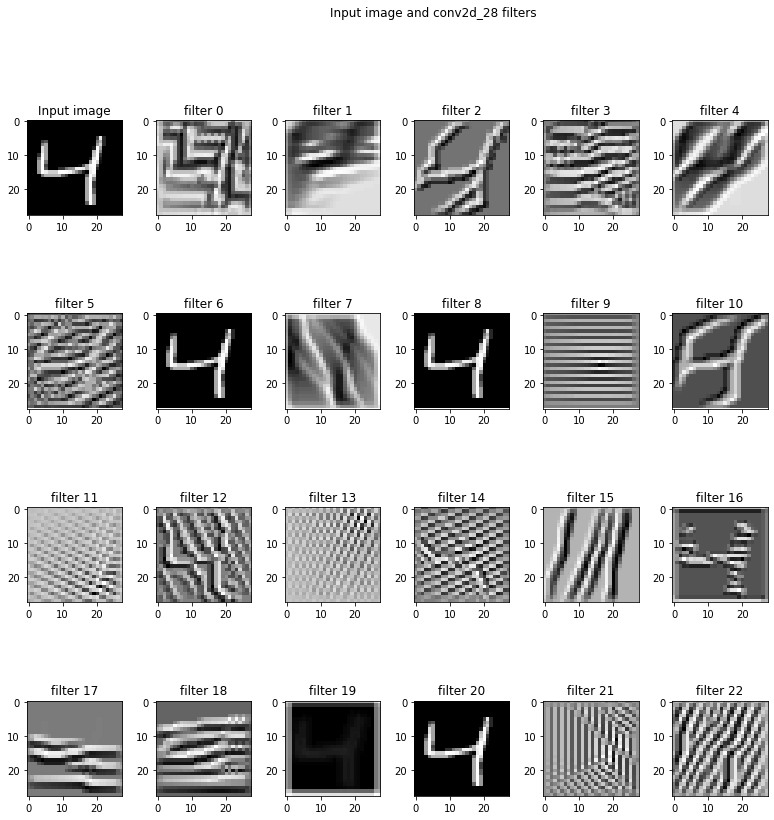

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_28'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()